<a href="https://colab.research.google.com/github/JunJul/DataRes-California-K-12-Disciplinary-Analytics/blob/Master/California_K_12_Disciplinary_Analytics_(suspension_vs_college_going_rate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Author: other Countribtors in my team

In [ ]:
# expulsion = pd.read_table("/content/expulsion23.txt",encoding='latin-1')
suspension = pd.read_table("/content/suspension23.txt",encoding='latin-1')
# rsd = pd.read_excel("/content/restraint and seclusion.xlsx", skiprows=1) # restraint and seclusion
# pubdistricts = pd.read_table("/content/pubdistricts.txt",encoding='latin-1')
# income = pd.read_csv("/content/income_data.csv", skiprows = [0])
cgr = pd.read_table("/content/college graudate rate.txt", encoding="latin-1") # college going rate

In [ ]:
# drop missing district values
expulsion.dropna(inplace = True)
suspension.dropna(inplace= True)
# rsd.dropna(inplace = True)
cgr.dropna(inplace = True)

# replace * with nan in reported data
expulsion.replace('*', np.nan, inplace=True)
suspension.replace('*', np.nan, inplace=True)
rsd.replace('*', np.nan, inplace=True)
cgr.replace('*', np.nan, inplace=True)

In [ ]:
# removing all Na values, thought process being NaN values will not be counted in aggregate commands anyways
expulsion.dropna(inplace=True)
suspension.dropna(inplace=True)
rsd.dropna(inplace=True)

In [ ]:
# counting values by charter
print(expulsion["CharterYN"][expulsion["CharterYN"] == "All"].count(),
      expulsion["CharterYN"][expulsion["CharterYN"] == "No "].count(),
      expulsion["CharterYN"][expulsion["CharterYN"] == "Yes"].count())

8196 102529 16191


In [ ]:
# fix data types
expulsion[['CumulativeEnrollment', 'Total Expulsions', 'Unduplicated Count of Students Expelled (Total)', 'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)', 'Expulsion Count Violent Incident (No Injury)', 'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only', 'Expulsion Count Other Reasons']] = expulsion[['CumulativeEnrollment', 'Total Expulsions','Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)','Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)','Expulsion Count Weapons Possession','Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only','Expulsion Count Other Reasons']].apply(pd.to_numeric)

suspension[['CumulativeEnrollment', 'Total Suspensions',
       'Unduplicated Count of Students Suspended (Total)',
       'Unduplicated Count of Students Suspended (Defiance-Only)',
       'Suspension Rate (Total)', 'Suspension Count Violent Incident (Injury)',
       'Suspension Count Violent Incident (No Injury)',
       'Suspension Count Weapons Possession',
       'Suspension Count Illicit Drug-Related',
       'Suspension Count Defiance-Only', 'Suspension Count Other Reasons']] = suspension[['CumulativeEnrollment', 'Total Suspensions',
       'Unduplicated Count of Students Suspended (Total)', 'Unduplicated Count of Students Suspended (Defiance-Only)',
       'Suspension Rate (Total)', 'Suspension Count Violent Incident (Injury)',
       'Suspension Count Violent Incident (No Injury)',
       'Suspension Count Weapons Possession',
       'Suspension Count Illicit Drug-Related',
       'Suspension Count Defiance-Only', 'Suspension Count Other Reasons']].apply(pd.to_numeric)

cgr[['High School Completers',
       'Enrolled In College - Total (12 Months)',
       'College Going Rate - Total (12 Months)',
       'Enrolled In-State (12 Months)', 'Enrolled Out-of-State (12 Months)',
       'Not Enrolled In College (12 Months)', 'Enrolled UC (12 Months)',
       'Enrolled CSU (12 Months)', 'Enrolled CCC (12 Months)',
       'Enrolled In-State Private (2 and 4 Year) (12 Months)',
       'Enrolled Out-of-State 4-Year College (Public/Private) (12 Months)',
       'Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)']] = cgr[['High School Completers',
       'Enrolled In College - Total (12 Months)',
       'College Going Rate - Total (12 Months)',
       'Enrolled In-State (12 Months)', 'Enrolled Out-of-State (12 Months)',
       'Not Enrolled In College (12 Months)', 'Enrolled UC (12 Months)',
       'Enrolled CSU (12 Months)', 'Enrolled CCC (12 Months)',
       'Enrolled In-State Private (2 and 4 Year) (12 Months)',
       'Enrolled Out-of-State 4-Year College (Public/Private) (12 Months)',
       'Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)']].apply(pd.to_numeric)

In [ ]:
#expulsion = expulsion[expulsion["CharterYN"] == "No "]
#expulsion.drop("CharterYN", axis = 1, inplace = True)
expulsion.columns

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expelled (Defiance-Only)',
       'Expulsion Rate (Total)', 'Expulsion Count Violent Incident (Injury)',
       'Expulsion Count Violent Incident (No Injury)',
       'Expulsion Count Weapons Possession',
       'Expulsion Count Illicit Drug-Related', 'Expulsion Count Defiance-Only',
       'Expulsion Count Other Reasons'],
      dtype='object')

In [ ]:
expulsion["ReportingCategory"].unique()
#expulsion.set_index(['DistrictName', 'ReportingCategory'], inplace=True, append=True)
#dupes = expulsion[expulsion.duplicated()]
#exp_other = expulsion.iloc[:, 0:8]
#exp_numcols = expulsion.iloc[:, 8:19]
#expulsion2 = exp_numcols.unstack("ReportingCategory")
#exp_final = exp_other.join(expulsion2)
#exp_final.describe()
rsd["Reporting \nCategory"].unique()

array(['TA'], dtype=object)

In [ ]:
exp_districts = expulsion[expulsion["SchoolName"] == "District Office"]
expulsion = expulsion[expulsion["SchoolName"] != "District Office"]
sus_districts = suspension[suspension["SchoolName"] == "District Office"]
suspension = suspension[suspension["SchoolName"] != "District Office"]
rsd_districts = rsd[rsd["School Name"] == "District Office"]
rsd = rsd[rsd["School Name"] != "District Office"]

In [ ]:
exp_female = expulsion[expulsion["ReportingCategory"] == "GF"]
exp_male = expulsion[expulsion["ReportingCategory"] == "GM"]
exp_asian = expulsion[expulsion["ReportingCategory"] == "RA"]
exp_africanamerican = expulsion[expulsion["ReportingCategory"] == "RB"]
exp_NONREPORTED = expulsion[expulsion["ReportingCategory"] == "RD"]
exp_filipino = expulsion[expulsion["ReportingCategory"] == "RF"]
exp_hispaniclatino = expulsion[expulsion["ReportingCategory"] == "RH"]
exp_nativeam = expulsion[expulsion["ReportingCategory"] == "RI"]
exp_pacificisl = expulsion[expulsion["ReportingCategory"] == "RP"]
exp_twoplusraces = expulsion[expulsion["ReportingCategory"] == "RT"]
exp_white = expulsion[expulsion["ReportingCategory"] == "RW"]
exp_disabilities = expulsion[expulsion["ReportingCategory"] == "SD"]
exp_englearners = expulsion[expulsion["ReportingCategory"] == "SE"]
exp_foster = expulsion[expulsion["ReportingCategory"] == "SF"]
exp_homeless = expulsion[expulsion["ReportingCategory"] == "SH"]
exp_socioecdis = expulsion[expulsion["ReportingCategory"] == "SS"]
exp_nonbinary = expulsion[expulsion["ReportingCategory"] == "GX"]
exp_migrant = expulsion[expulsion["ReportingCategory"] == "SM"]
exp_total = expulsion[expulsion["ReportingCategory"] == "TA"]

sus_female = suspension[suspension["ReportingCategory"] == "GF"]
sus_male = suspension[suspension["ReportingCategory"] == "GM"]
sus_asian = suspension[suspension["ReportingCategory"] == "RA"]
sus_africanamerican = suspension[suspension["ReportingCategory"] == "RB"]
sus_NONREPORTED = suspension[suspension["ReportingCategory"] == "RD"]
sus_filipino = suspension[suspension["ReportingCategory"] == "RF"]
sus_hispaniclatino = suspension[suspension["ReportingCategory"] == "RH"]
sus_nativeam = suspension[suspension["ReportingCategory"] == "RI"]
sus_pacificisl = suspension[suspension["ReportingCategory"] == "RP"]
sus_twoplusraces = suspension[suspension["ReportingCategory"] == "RT"]
sus_white = suspension[suspension["ReportingCategory"] == "RW"]
sus_disabilities = suspension[suspension["ReportingCategory"] == "SD"]
sus_englearners = suspension[suspension["ReportingCategory"] == "SE"]
sus_foster = suspension[suspension["ReportingCategory"] == "SF"]
sus_homeless = suspension[suspension["ReportingCategory"] == "SH"]
sus_socioecdis = suspension[suspension["ReportingCategory"] == "SS"]
sus_nonbinary = suspension[suspension["ReportingCategory"] == "GX"]
sus_migrant = suspension[suspension["ReportingCategory"] == "SM"]
sus_total = suspension[suspension["ReportingCategory"] == "TA"]

Author: Junze He

In [ ]:
expulsion.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Total Expulsions,Unduplicated Count of Students Expelled (Total),Unduplicated Count of Students Expelled (Defiance-Only),Expulsion Rate (Total),Expulsion Count Violent Incident (Injury),Expulsion Count Violent Incident (No Injury),Expulsion Count Weapons Possession,Expulsion Count Illicit Drug-Related,Expulsion Count Defiance-Only,Expulsion Count Other Reasons
44537,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GF,...,0,0,0,0.0,0,0,0,0,0,0
44538,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GM,...,0,0,0,0.0,0,0,0,0,0,0
44540,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RB,...,0,0,0,0.0,0,0,0,0,0,0
44543,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RH,...,0,0,0,0.0,0,0,0,0,0,0
44548,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,SD,...,0,0,0,0.0,0,0,0,0,0,0


In [ ]:
suspension.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,ReportingCategory,...,Total Suspensions,Unduplicated Count of Students Suspended (Total),Unduplicated Count of Students Suspended (Defiance-Only),Suspension Rate (Total),Suspension Count Violent Incident (Injury),Suspension Count Violent Incident (No Injury),Suspension Count Weapons Possession,Suspension Count Illicit Drug-Related,Suspension Count Defiance-Only,Suspension Count Other Reasons
44537,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GF,...,0,0,0,0.0,0,0,0,0,0,0
44538,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,GM,...,0,0,0,0.0,0,0,0,0,0,0
44540,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RB,...,0,0,0,0.0,0,0,0,0,0,0
44543,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,RH,...,0,0,0,0.0,0,0,0,0,0,0
44548,2022-23,S,1,10017.0,130419.0,Alameda,Alameda County Office of Education,Alameda County Community,No,SD,...,0,0,0,0.0,0,0,0,0,0,0


In [ ]:
rsd.head()

,Academic Year,Aggregate Level,County Code,District Code,School Code,County Name,District Name,School Name,NPS,Reporting \nCategory,Count of Mechanical Restraints,Unduplicated Count of Students Mechanically Restrained,Count of Physical Restraints,Unduplicated Count of Students Physically Restrained,Count of Seclusions,Unduplicated Count of Students Secluded,Certification Status \n(Y/N)
63,2022-2023,S,1,10017,112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,All,TA,0.0,0.0,0.0,0.0,0.0,0.0,Y
64,2022-2023,S,1,10017,123968,Alameda,Alameda County Office of Education,Community School for Creative Education,All,TA,0.0,0.0,0.0,0.0,0.0,0.0,Y
65,2022-2023,S,1,10017,124172,Alameda,Alameda County Office of Education,Yu Ming Charter,All,TA,0.0,0.0,0.0,0.0,0.0,0.0,Y
66,2022-2023,S,1,10017,125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,All,TA,0.0,0.0,0.0,0.0,0.0,0.0,Y
67,2022-2023,S,1,10017,130625,Alameda,Alameda County Office of Education,Alternatives in Action,All,TA,0.0,0.0,0.0,0.0,0.0,0.0,Y


In [ ]:
pubdistricts.head()

,CD Code,County,District,City,Zip,Latitude,Longitude
0,110017,Alameda,Alameda County Office of Education,Hayward,94544-1136,37.658212,-122.09713
1,131609,Alameda,California School for the Blind (State Special...,Fremont,94536-4365,37.562576,-121.96563
2,131617,Alameda,California School for the Deaf-Fremont (State ...,Fremont,94538-2308,37.558956,-121.96551
3,161119,Alameda,Alameda Unified,Alameda,94501-1037,37.782147,-122.27009
4,161127,Alameda,Albany City Unified,Albany,94706-1725,37.890302,-122.29575


In [ ]:
income.head()

,Geography,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,Margin of Error!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars),Margin of Error!!Nonfamily households!!Mean income (dollars),Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Unnamed: 130
0,860Z200US89010,ZCTA5 89010,188,62,0.0,18.0,0.0,18.0,17.6,11.7,...,7749,48579,26923,(X),(X),(X),(X),3.3,(X),NaN
1,860Z200US89019,ZCTA5 89019,1150,331,0.0,3.2,4.4,4.6,24.5,18.7,...,24589,49620,21540,(X),(X),(X),(X),20.0,(X),NaN
2,860Z200US89060,ZCTA5 89060,5129,452,6.7,3.5,5.0,2.6,9.8,3.5,...,8525,53358,6629,(X),(X),(X),(X),38.0,(X),NaN
3,860Z200US89061,ZCTA5 89061,3326,382,2.7,2.1,1.1,1.4,7.2,5.1,...,3860,56346,12656,(X),(X),(X),(X),28.5,(X),NaN
4,860Z200US89439,ZCTA5 89439,834,110,5.0,5.6,3.5,4.1,9.7,7.8,...,**,50844,19009,(X),(X),(X),(X),9.7,(X),NaN


In [ ]:
cgr.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterSchool,AlternativeSchoolAccountabilityStatus,...,College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months),Enrolled UC (12 Months),Enrolled CSU (12 Months),Enrolled CCC (12 Months),Enrolled In-State Private (2 and 4 Year) (12 Months),Enrolled Out-of-State 4-Year College (Public/Private) (12 Months),Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)
22466,2020-21,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,No,Yes,...,35.0,6.0,1.0,13.0,0.0,0.0,3.0,3.0,1.0,0.0
22467,2020-21,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,All,No,...,63.9,38.0,1.0,22.0,6.0,17.0,14.0,1.0,1.0,0.0
22468,2020-21,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,All,No,...,68.5,36.0,1.0,17.0,6.0,17.0,12.0,1.0,1.0,0.0
22469,2020-21,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,All,All,...,68.5,36.0,1.0,17.0,6.0,17.0,12.0,1.0,1.0,0.0
22470,2020-21,D,1,10017.0,0.0,Alameda,Alameda County Office of Education,District Office,Yes,Yes,...,14.8,13.0,0.0,75.0,0.0,1.0,12.0,0.0,0.0,0.0


In [ ]:
print(suspension.columns)
print(expulsion.columns)
print(rsd.columns)
print(pubdistricts.columns)
print(income.columns)
print(cgr.columns)

Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Suspensions',
       'Unduplicated Count of Students Suspended (Total)',
       'Unduplicated Count of Students Suspended (Defiance-Only)',
       'Suspension Rate (Total)', 'Suspension Count Violent Incident (Injury)',
       'Suspension Count Violent Incident (No Injury)',
       'Suspension Count Weapons Possession',
       'Suspension Count Illicit Drug-Related',
       'Suspension Count Defiance-Only', 'Suspension Count Other Reasons'],
      dtype='object')
Index(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterYN',
       'ReportingCategory', 'CumulativeEnrollment', 'Total Expulsions',
       'Unduplicated Count of Students Expelled (Total)',
       'Unduplicated Count of Students Expell

In [ ]:
suspension.groupby(["CountyName",
                    "ReportingCategory"])["Unduplicated Count of Students Suspended (Total)"].transform(sum).reset_index()

,index,Unduplicated Count of Students Suspended (Total)
0,44537,2211
1,44538,4505
2,44540,1660
3,44543,2962
4,44548,1939
...,...,...
107104,226113,65
107105,226114,386
107106,226115,234
107107,226118,773


In [ ]:
type(suspension["Unduplicated Count of Students Suspended (Total)"])

pandas.core.series.Series

In [ ]:
suspension2 = suspension[suspension["Unduplicated Count of Students Suspended (Total)"] != "*"]

In [ ]:
suspension2["Unduplicated Count of Students Suspended (Total)"] = suspension2["Unduplicated Count of Students Suspended (Total)"].astype(int)

In [ ]:
total_suspended_EachCounty = suspension2.groupby(["CountyName", "ReportingCategory"])["Unduplicated Count of Students Suspended (Total)"].sum().to_frame().reset_index()

In [ ]:
cgr2 = cgr[cgr["College Going Rate - Total (12 Months)"] != "*"]

In [ ]:
cgr2["College Going Rate - Total (12 Months)"] = cgr2["College Going Rate - Total (12 Months)"].astype(float)
ave_cgr_eachCounty = cgr2.groupby(["CountyName", "ReportingCategory"])["College Going Rate - Total (12 Months)"].mean().to_frame().reset_index()
ave_cgr_eachCounty.head()

,CountyName,ReportingCategory,College Going Rate - Total (12 Months)
0,Alameda,GF,64.386481
1,Alameda,GM,56.830335
2,Alameda,GX,NaN
3,Alameda,RA,84.900331
4,Alameda,RB,57.386121


In [ ]:
total_suspended_CGR_EachCounty = total_suspended_EachCounty.merge(
    ave_cgr_eachCounty,
    how = "left",
    on = ["CountyName", "ReportingCategory"]).fillna(0)

In [ ]:
total_suspended_CGR_EachCounty.head()

,CountyName,ReportingCategory,Unduplicated Count of Students Suspended (Total),College Going Rate - Total (12 Months)
0,Alameda,GF,2211,64.386481
1,Alameda,GM,4505,56.830335
2,Alameda,GX,2,0.000000
3,Alameda,RA,514,84.900331
4,Alameda,RB,1660,57.386121


In [ ]:
total_suspended_CGR_EachCounty.columns = ["CountyName", "ReportingCategory", "TotalSuspended", "College_Going_Rate12M"]
total_suspended_CGR_EachCounty.head()

,CountyName,ReportingCategory,TotalSuspended,College_Going_Rate12M
0,Alameda,GF,2211,64.386481
1,Alameda,GM,4505,56.830335
2,Alameda,GX,2,0.000000
3,Alameda,RA,514,84.900331
4,Alameda,RB,1660,57.386121


In [ ]:
ave_cgr = total_suspended_CGR_EachCounty.groupby("ReportingCategory").College_Going_Rate12M.mean().to_frame().reset_index()
total_suspeneded = total_suspended_CGR_EachCounty.groupby("ReportingCategory").TotalSuspended.sum().to_frame().reset_index()

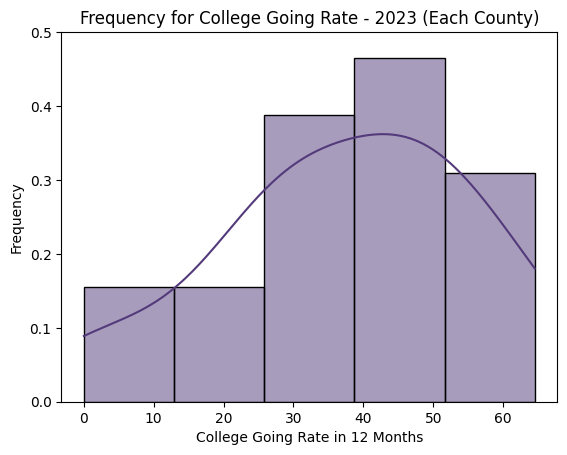

In [ ]:
sns.histplot(
    ave_cgr,
    x = "College_Going_Rate12M",
    color = "#533A7B",
    stat = "frequency",
    kde = True,
    bins = 5
)
plt.ylim((0.0, 0.5))
plt.xlabel("College Going Rate in 12 Months")
plt.title("Frequency for College Going Rate - 2023 (Each County)")
plt.show()

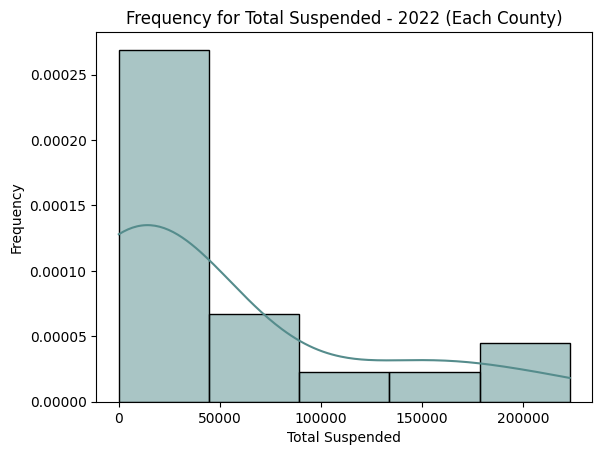

In [ ]:
sns.histplot(
    total_suspeneded,
    x = "TotalSuspended",
    color = "#558C8C",
    stat = "frequency",
    kde = True,
    bins = 5
)

# plt.ylim((0.0, 0.5))
plt.xlabel("Total Suspended")
plt.title("Frequency for Total Suspended - 2022 (Each County)")
plt.show()

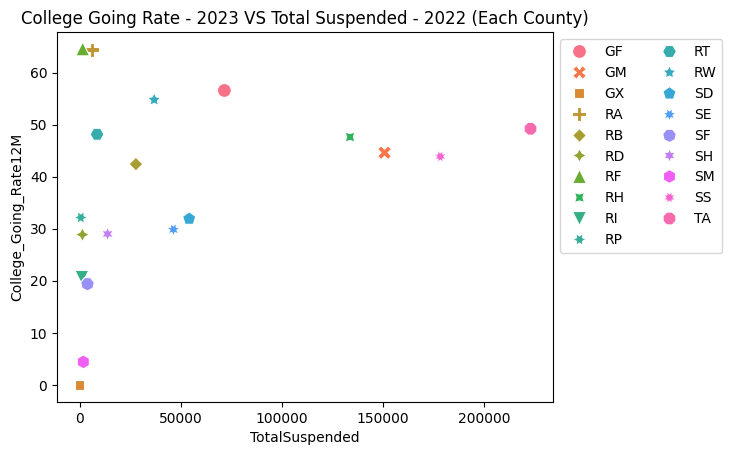

In [ ]:
sns_legend  = sns.scatterplot(
    x = total_suspeneded.TotalSuspended,
    y = ave_cgr.College_Going_Rate12M,
    hue = total_suspeneded.ReportingCategory,
    style = total_suspeneded.ReportingCategory,
    s = 100
)

sns_legend.legend(bbox_to_anchor = (1, 1), ncol = 2)
plt.title("College Going Rate - 2023 VS Total Suspended - 2022 (Each County)")
plt.show()

In [ ]:
total_suspended_EachDistrict = suspension2.groupby(["DistrictName", "ReportingCategory"])["Unduplicated Count of Students Suspended (Total)"].sum().to_frame().reset_index()
ave_cgr_eachDistrict = cgr2.groupby(["DistrictName", "ReportingCategory"])["College Going Rate - Total (12 Months)"].mean().to_frame().reset_index()


In [ ]:
total_suspended_CGR_eachDistrict = total_suspended_EachDistrict.merge(
    ave_cgr_eachDistrict,
    how = "left",
    on = ["DistrictName", "ReportingCategory"]).fillna(0)

In [ ]:
total_suspended_CGR_eachDistrict.columns = ["CountyName", "ReportingCategory", "TotalSuspended", "College_Going_Rate12M"]
total_suspended_CGR_eachDistrict.head()

,CountyName,ReportingCategory,TotalSuspended,College_Going_Rate12M
0,ABC Unified,GF,102,52.155172
1,ABC Unified,GM,261,46.406452
2,ABC Unified,RA,12,79.485000
3,ABC Unified,RB,50,57.231579
4,ABC Unified,RD,4,0.000000


In [ ]:
ave_cgr2 = total_suspended_CGR_eachDistrict.groupby("ReportingCategory").College_Going_Rate12M.mean().to_frame().reset_index()
total_suspeneded2 = total_suspended_CGR_eachDistrict.groupby("ReportingCategory").TotalSuspended.sum().to_frame().reset_index()

In [ ]:
summary = total_suspeneded2.merge(
    ave_cgr2,
    how = "left",
    on = ["ReportingCategory"]).fillna(0)

In [ ]:
summary.ReportingCategory = summary.ReportingCategory.map({
    "RB":"African American",
    "RI":"American Indian or Alaska Native",
    "RA":"Asian",
    "RF":"Filipino",
    "RH":"Hispanic or Latino",
    "RD":"Not Reported",
    "RP": "Pacific Islander",
    "RT": "Two or More Races",
    "RW": "White",
    "GM": "Male",
    "GF": "Female",
    "GX": "Non-Binary Gender",
    "GZ": "Missing Gender",
    "SE": "English Learners",
    "SD": "Students with Disabilities",
    "SS": "Socioeconomically Disadvantaged",
    "SM": "Migrant",
    "SF": "Foster",
    "SH": "Homeless",
    "TA": "Total"
})

In [ ]:
summary.head()

,ReportingCategory,TotalSuspended,College_Going_Rate12M
0,Female,71672,29.452432
1,Male,150920,23.335942
2,Non-Binary Gender,34,0.000000
3,Asian,6125,34.176981
4,African American,27894,26.175955


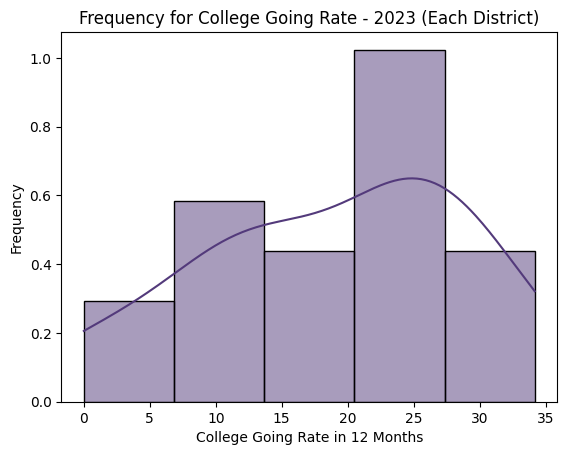

In [ ]:
sns.histplot(
    ave_cgr2,
    x = "College_Going_Rate12M",
    color = "#533A7B",
    stat = "frequency",
    kde = True,
    bins = 5
)

plt.xlabel("College Going Rate in 12 Months")
plt.title("Frequency for College Going Rate - 2023 (Each District)")
plt.show()

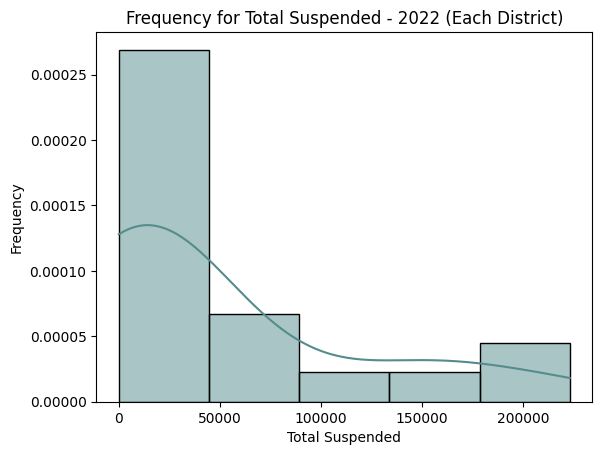

In [ ]:
sns.histplot(
    total_suspeneded2,
    x = "TotalSuspended",
    color = "#558C8C",
    stat = "frequency",
    kde = True,
    bins = 5
)

# plt.ylim((0.0, 0.5))
plt.xlabel("Total Suspended")
plt.title("Frequency for Total Suspended - 2022 (Each District)")
plt.show()

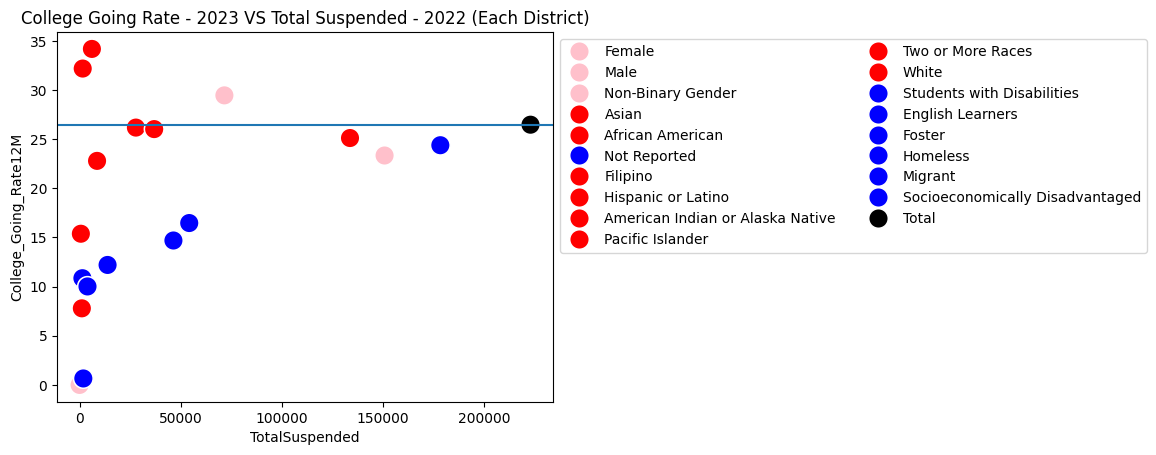

In [ ]:
custom_colors = {
    "Female": "pink", "Male": "pink", "Non-Binary Gender": "pink",

    "Asian" : "red", "African American" : "red", "Filipino" : "red", "Hispanic or Latino" : "red",
    "American Indian or Alaska Native" : "red", "Pacific Islander" : "red", "Two or More Races" : "red",
    "White" : "red",

    "Students with Disabilities" : "blue", "English Learners" : "blue", "English Leaners" : "blue",
    "English Leaners" : "blue", "Foster" : "blue", "Homeless" : "blue", "Migrant" : "blue",
    "Socioeconomically Disadvantaged" : "blue", "Not Reported" : "blue",

    "Total": "black"
    }

line = summary.iloc[18, ]["College_Going_Rate12M"]

sns_legend  = sns.scatterplot(
    x = summary.TotalSuspended,
    y = summary.College_Going_Rate12M,
    hue = summary.ReportingCategory,
    palette=custom_colors,
    s = 200
)

sns_legend.legend(bbox_to_anchor = (1, 1), ncol = 2)
plt.title("College Going Rate - 2023 VS Total Suspended - 2022 (Each District)")
plt.axhline(y=line)
plt.show()

In [ ]:
genderGroup = summary.iloc[0:3, ]
genderGroup = genderGroup.append(summary.iloc[18, ])

raceGroup = summary.iloc[3:12, ]
raceGroup = raceGroup.drop(5)
raceGroup = raceGroup.append(summary.iloc[18, ])

otherGroup = summary.iloc[12:18, ]
otherGroup = otherGroup.append(summary.iloc[5, ])
otherGroup = otherGroup.append(summary.iloc[18, ])

<ipython-input-122-02934ac41ee6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genderGroup = genderGroup.append(summary.iloc[18, ])
<ipython-input-122-02934ac41ee6>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raceGroup = raceGroup.append(summary.iloc[18, ])
<ipython-input-122-02934ac41ee6>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  otherGroup = otherGroup.append(summary.iloc[5, ])
<ipython-input-122-02934ac41ee6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  otherGroup = otherGroup.append(summary.iloc[18, ])


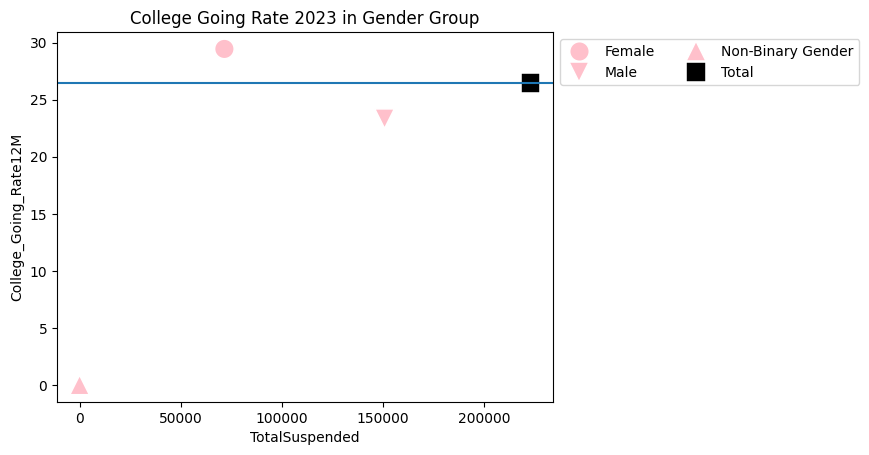

In [ ]:
color = ["pink"] * 3
color.append("black")

sns_legend = sns.scatterplot(
    x=genderGroup.TotalSuspended,
    y=genderGroup.College_Going_Rate12M,
    hue=genderGroup.ReportingCategory,  # Replace YourCustomHueVariable with your own categorical variable
    palette= color,
    style = genderGroup.ReportingCategory,
    markers=["o", "v", "^", "s"],  # Use custom marker styles
    s=200
)

sns_legend.legend(bbox_to_anchor = (1, 1), ncol = 2)
plt.title("College Going Rate 2023 in Gender Group")
plt.axhline(y=line)
plt.show()

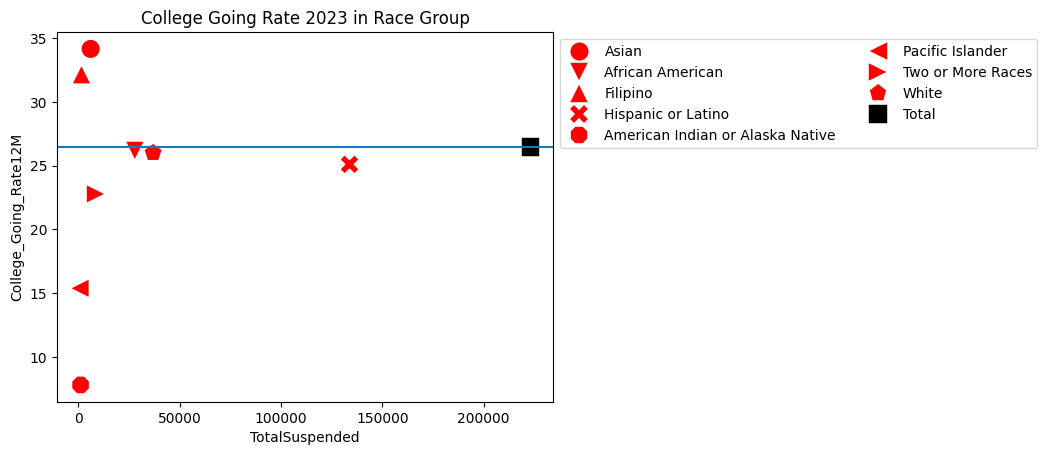

In [ ]:
color = ['red'] * 8
color.append('black')

sns_legend = sns.scatterplot(
    x=raceGroup.TotalSuspended,
    y=raceGroup.College_Going_Rate12M,
    hue=raceGroup.ReportingCategory,  # Replace YourCustomHueVariable with your own categorical variable
    palette=color,
    style = raceGroup.ReportingCategory,
    markers=["o", "v", "^", "X", "8", "<", ">", "p", "s"],  # Use custom marker styles
    s=200
)

sns_legend.legend(bbox_to_anchor = (1, 1), ncol = 2)
plt.title("College Going Rate 2023 in Race Group")
plt.axhline(y=line)
plt.show()

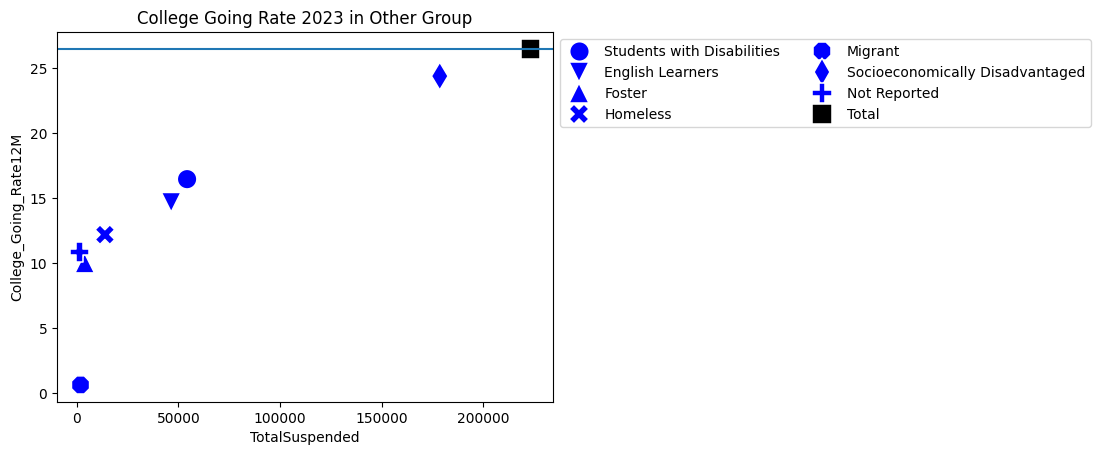

In [ ]:
color = ['blue'] * 7
color.append('black')

sns_legend = sns.scatterplot(
    x=otherGroup.TotalSuspended,
    y=otherGroup.College_Going_Rate12M,
    hue=otherGroup.ReportingCategory,  # Replace YourCustomHueVariable with your own categorical variable
    palette=color,
    style = otherGroup.ReportingCategory,
    markers=["o", "v", "^", "X", "8", "d", "P", "s"],  # Use custom marker styles
    s=200
)

sns_legend.legend(bbox_to_anchor = (1, 1), ncol = 2)
plt.title("College Going Rate 2023 in Other Group")
plt.axhline(y=line)
plt.show()